In this section, I will create a scatter plot based on Matplotlib with cars.csv.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [42]:
cars = pd.read_csv('../cars.csv')
cars.head()

,Unnamed: 0,Car,Manufacturer,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model.Year,Origin
0,5,torino,ford,17.0,8,302,140.0,3449,10.5,70,American
1,6,galaxie 500,ford,15.0,8,429,198.0,4341,10.0,70,American
2,13,torino (sw),ford,NaN,8,351,153.0,4034,11.0,70,American
3,18,mustang boss 302,ford,NaN,8,302,140.0,3353,8.0,70,American
4,21,corona mark ii,toyota,24.0,4,113,95.0,2372,15.0,70,Japanese


In [43]:
cars["MPG"].describe()
cars["Weight"].describe()

count    95.000000
mean     24.157895
std       7.656239
min      10.000000
25%      18.000000
50%      24.000000
75%      29.950000
max      44.600000
Name: MPG, dtype: float64

count      97.000000
mean     2861.051546
std       839.486691
min      1649.000000
25%      2228.000000
50%      2702.000000
75%      3302.000000
max      4906.000000
Name: Weight, dtype: float64

In [44]:
# Define circle color. 
conditions = [
    (cars["Manufacturer"] == "ford"),
    (cars["Manufacturer"] == "bmw"),
    (cars["Manufacturer"] == "mercedes"),
    (cars["Manufacturer"] == "toyota"),
    (cars["Manufacturer"] == "honda")
]

values = ['#cacb8a', '#f3b8b4', '#98d8f9', '#edb0f2', "#82d5b1"]

cars['scatterColor'] = np.select(conditions, values)
cars["scatterColor"].unique()


array(['#cacb8a', '#edb0f2', '#f3b8b4', '#82d5b1', '#98d8f9'],
      dtype=object)

In [45]:
# Define circle dimension
minW = cars["Weight"].min()
maxW = cars["Weight"].max()
cars["dim"] = np.array([((i - minW) * 70/(maxW-minW)**0.8)  for i in cars["Weight"]])
cars["dim"].describe()

count     97.000000
mean     131.330296
std       90.961507
min        0.000000
25%       62.736805
50%      114.096469
75%      179.108702
max      352.908072
Name: dim, dtype: float64

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'MPG')

([<matplotlib.axis.XTick at 0x169bd586430>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x169bd5923d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

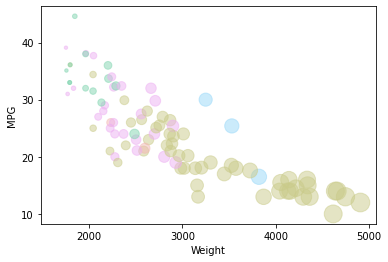

In [46]:
# Plot Graph
fig, ax = plt.subplots()
ax.scatter(cars["Weight"], cars["MPG"], c=cars["scatterColor"], alpha=0.5, s=cars["dim"])

ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
plt.xticks(np.arange(2000, 6000, 1000))
plt.yticks(np.arange(10, 50, 10))

plt.show()